

# **Mielage Prediction - Regression Analysis**



**Source:**
This dataset was taken from the Statlib library which is maintained at the Carnegie Mellon University. This dataset was used in the 1983 American Statistical Association Exposition.

**Dataset Information:**
This dataset is a slgihtly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg, 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Attribute Information:**
1. mpg: continuous
2. cylinders: continuous
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string(unique for each instance)

# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Import Data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Values

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

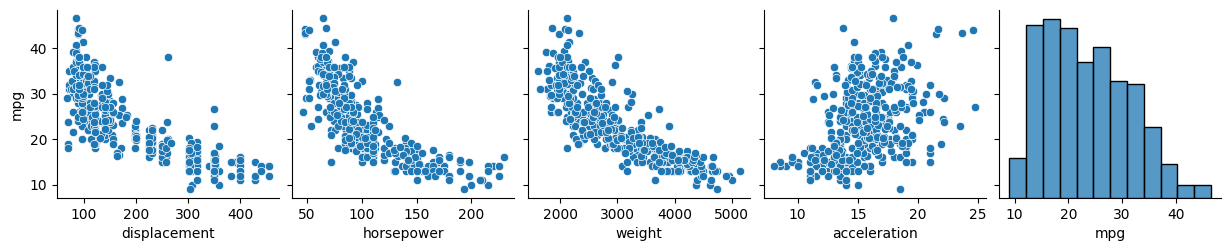

In [13]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

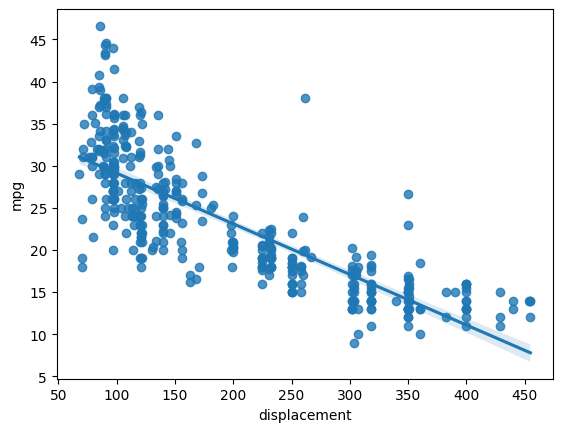

In [14]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# Define Target Variable y and Feature X

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y = df['mpg']

In [17]:
y.shape

(392,)

In [18]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [19]:
x.shape

(392, 4)

# Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [22]:
x = ss.fit_transform(x)

In [23]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [24]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**After standardization mean is zero and standard deviation is one**

# Train Test Split Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [27]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [31]:
lr.intercept_

23.286316072312015

In [32]:
lr.coef_

array([-0.54205626, -2.04536326, -4.50909354, -0.53825589])

**Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error**

# Predict Test Data

In [33]:
y_pred = lr.predict(xtest)

In [34]:
y_pred

array([18.27767858, 23.30417601, 23.41275532, 29.9143869 , 23.39105644,
       13.49018914, 15.25485238, 30.19462327, 27.86837019, 15.28782636,
       11.63016624, 25.78689357, 27.93899646, 27.24424127, 31.16751086,
       14.03774571, 12.08678421, 19.475965  , 22.30183698, 28.34933069,
       26.70966499, 28.35192725, 24.62418935, 18.86997332, 16.12094196,
       16.02797241, 28.16991091, 24.43729687, 20.63670619, 25.65187295,
       18.68042933, 31.50976642, 30.30700987, 19.53471334, 20.59392501,
       21.13619689, 25.02026423, 31.75354519, 25.56099182, 30.02602366,
       19.75686724, 16.02910293, 21.81414389, 15.38584121, 14.7744877 ,
       27.75971196, 30.10822247, 30.37941822, 32.5904079 , 30.6521732 ,
       19.23769508, 24.56679015, 30.87608403, 27.83542359, 25.98732286,
       30.93043308, 20.16984483, 27.58752026, 27.47071   ,  7.38796527,
       26.70708879, 29.31884403, 13.50295741, 32.58133572, 31.69469816,
       24.51681688, 22.86041174, 26.43913414, 25.48831938, 24.79

#Predict Train Data

In [43]:
lr.predict(xtrain)

array([26.30398841, 29.09769405, 18.70350654, 29.30636988, 28.70312598,
       15.07890467, 31.29810176, 22.14985631, 16.97973277, 24.04627869,
       27.46032244, 30.13517094, 23.6466299 , 23.29489004, 15.5646094 ,
       24.07306122, 14.27484657, 29.45068056, 22.01950316, 27.18157876,
       27.65160602, 27.5755111 , 30.52909561, 33.5667714 , 22.993286  ,
       16.79792747, 21.17773363, 21.36597594, 29.1956594 , 26.99959972,
       27.70538754, 30.66482572, 26.25378736, 11.67824306,  8.64916659,
       23.12673949, 29.56408185, 10.5377114 , 29.19700639, 24.66266261,
       29.61761382, 19.65287642, 25.53683092, 23.85828763, 31.34437845,
       10.52656615, 27.62356786, 17.18631659,  9.75470104,  9.96424233,
       16.55669252, 27.16289827, 30.35487966, 29.49510378, 17.39382568,
       29.08274822, 29.74843043, 19.58226112, 24.46722786, 10.02544063,
       28.83705526, 18.66416597, 30.63295689, 16.39166578, 24.08440457,
       20.87881069, 20.65493085, 25.77758029, 25.84156122,  9.80

# Model Accuracy

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [36]:
mean_absolute_error(ytest, y_pred)

3.1998034418718584

In [37]:
mean_absolute_percentage_error(ytest, y_pred)

0.14130467105908587

In [38]:
r2_score(ytest, y_pred)

0.710238537923364